# 0.0 Imports

In [40]:
import pandas     as pd
import seaborn    as sns
import umap.umap_ as umap

from plotly     import express as px
from sklearn    import cluster as c
from sklearn    import metrics as m
from matplotlib import pyplot  as plt

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# 0.1 Helper Functions

# 0.2 Loading Data

In [2]:
df_raw = pd.read_csv('C:/Users/PICHAU/repos/cluster_project/data/raw/data.csv', encoding = 'unicode_escape') 

# 1.0 Data Description

In [3]:
df1 = df_raw.copy()

In [4]:
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 1.1 Data Dimensions and Types

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 1.2 Check NaN's

In [6]:
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 1.2.1 Replace NaN's

In [7]:
df1 = df1.dropna(subset=['Description','CustomerID'])

In [8]:
df1.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 1.3 Change Types

In [9]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1['CustomerID'] = df1['CustomerID'].astype(int)

In [10]:
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


## 1.3 Descriptive Statistics

# 2.0 Feature Engineering

In [11]:
df2 = df1.copy()

## 2.1 Feature Creation

In [12]:
# ======= RFM MODEL ========

# refference table - customer
df_ref = pd.DataFrame(df2['CustomerID']).drop_duplicates(keep='first', ignore_index=True)
df_ref = df_ref.dropna(subset=['CustomerID'])

# Gross Revenue (Monetary)
df2['GrossRevenue'] = df2['Quantity'] * df2['UnitPrice']

df_monetary = df2[['GrossRevenue','CustomerID']].groupby('CustomerID').sum().reset_index() 
df_ref = pd.merge(df_ref, df_monetary, on='CustomerID', how='left')

# Recency days (Recency)
df_recency = df2[['CustomerID', 'InvoiceDate']].groupby('CustomerID').max().reset_index()
df_recency['RecencyDays'] = (df2['InvoiceDate'].max() - df_recency['InvoiceDate']).dt.days
df_recency = df_recency[['CustomerID', 'RecencyDays']]
df_ref = pd.merge(df_ref, df_recency, on='CustomerID', how='left')

# Purchase frequence (Frequency) 
df_freq = df2[['CustomerID', 'InvoiceNo']].drop_duplicates().groupby('CustomerID').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='CustomerID', how='left')

# Average Ticket
df_avgt = df2[['CustomerID', 'GrossRevenue']].drop_duplicates().groupby('CustomerID').mean().reset_index().rename(columns={'GrossRevenue':'AvgTicket'})
df_ref = pd.merge(df_ref, df_avgt, on='CustomerID', how='left')

df_ref.head(5)

,CustomerID,GrossRevenue,RecencyDays,InvoiceNo,AvgTicket
0,17850,5288.63,301,35,18.147436
1,13047,3079.10,31,18,14.346818
2,12583,7187.34,2,18,32.828118
3,13748,948.25,95,5,32.147500
4,15100,635.10,329,6,56.940000


In [13]:
df_ref.isna().sum()

CustomerID      0
GrossRevenue    0
RecencyDays     0
InvoiceNo       0
AvgTicket       0
dtype: int64

# 3.0 Data Filtration 

In [14]:
df3 = df_ref.copy()

# 4.0 EDA

In [15]:
df4 = df3.copy()

# 5.0 Data Preparation

In [16]:
df5 = df4.copy()

# 6.0 Feature Selection

In [17]:
df6 = df5.copy()

# 7.0 Hyperparameter Fine Tunning

In [19]:
df7 = df6.copy()

x = df6.drop(columns=['CustomerID'])

In [20]:
cluster = [2,3,4,5,6,7]

## 7.1 Within-Cluster Sum of Square

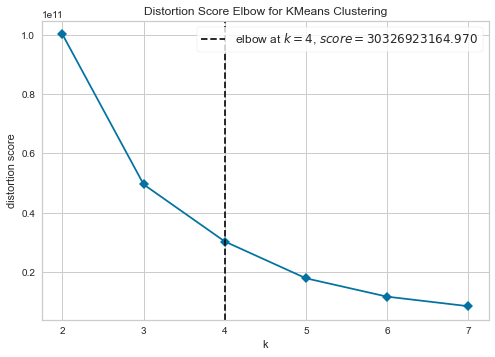

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
kmeans = KElbowVisualizer(c.KMeans(n_init=10), k=cluster, timings=False)
kmeans.fit(x)
kmeans.show()

## 7.2 Silhouette Score

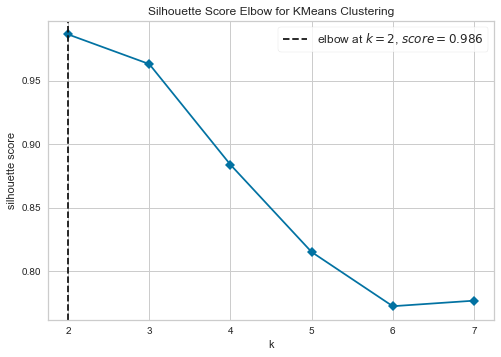

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
kmeans = KElbowVisualizer(c.KMeans(n_init=10), k=cluster, metric='silhouette', timings=False)
kmeans.fit(x)
kmeans.show()

<b> NOTE: WSS indicates k = 3. SS indicates k = 2. But in this case, k=3 was chosen because (looking to SS plot), the difference betwen k=2 (score = 0.986) and k=3 (0.97) is low.</b>

## 7.2.1 Silhouette Analysis

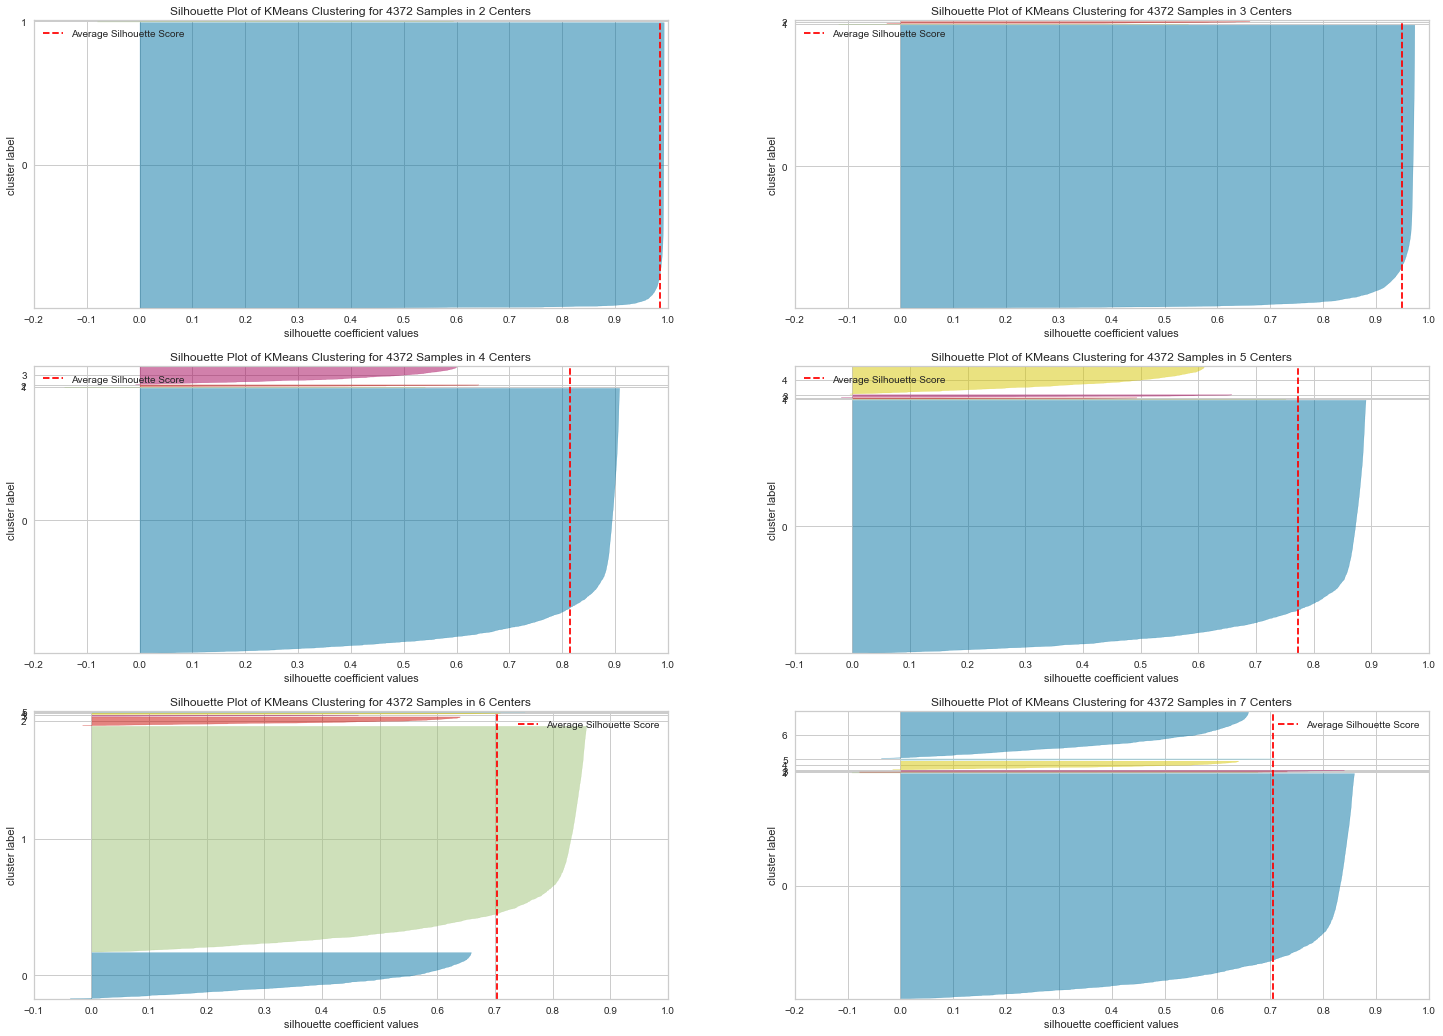

In [29]:
fig, ax = plt.subplots(3, 2, figsize=(25, 18))

for k in cluster:
    km = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    vz = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    vz.fit(x)
    vz.finalize()

# 8.0 Model Trainning

## 8.1 K-Means

In [30]:
k = 4
kmeansf = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

kmeansf.fit(x)

labels = kmeansf.labels_
# labels = kmeans.predict(x)

### 8.1.2 Cluster Validation

In [31]:
# WSS
print('WSS: ', kmeansf.inertia_)

# SS
print('SS: ', m.silhouette_score(x, labels, metric='euclidean'))

WSS:  40055964954.653885
SS:  0.8139926468369666


# 9.0 Cluster Analysis

In [32]:
df9 = df6.copy()
df9['Clusters'] = labels

In [33]:
df9.head(2)

,CustomerID,GrossRevenue,RecencyDays,InvoiceNo,AvgTicket,Clusters
0,17850,5288.63,301,35,18.147436,3
1,13047,3079.10,31,18,14.346818,0


## 9.1 Visualization Inspection

C:\Users\PICHAU\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


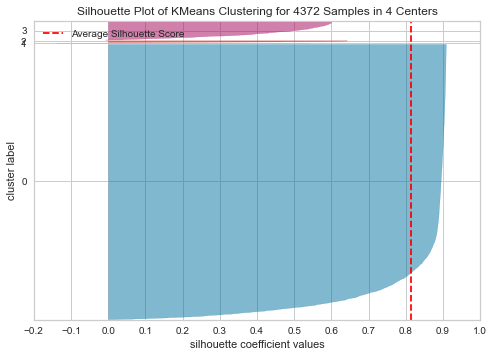

In [35]:
vz2 = SilhouetteVisualizer(kmeansf, colors='yellowbrick')
vz2.fit(x)
vz2.finalize()

## 9.2 2d Plot

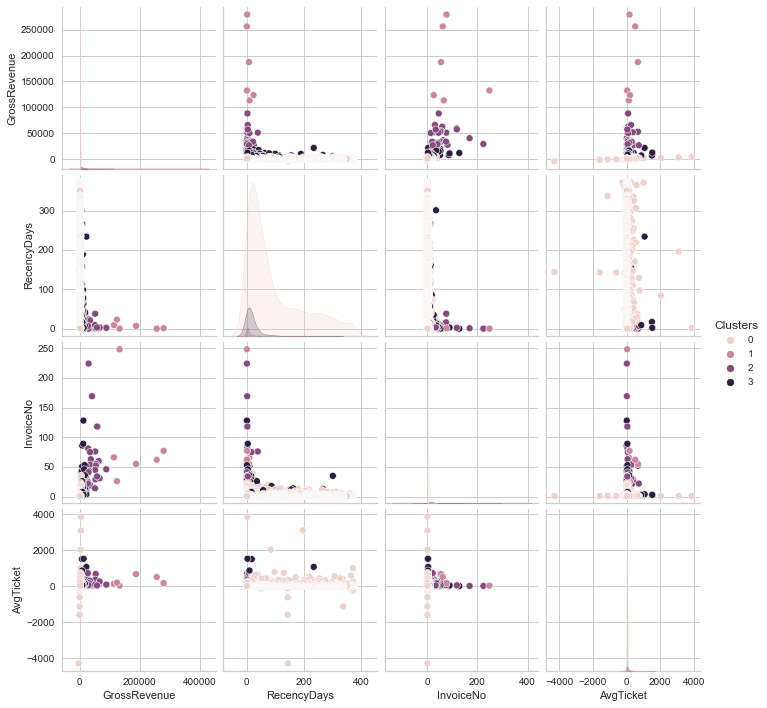

In [38]:
df_plot = df9.drop(columns='CustomerID')
sns.pairplot(df_plot, hue='Clusters')

## 9.3 UMAP 

<AxesSubplot:xlabel='EmbeddingX', ylabel='EmbeddingY'>

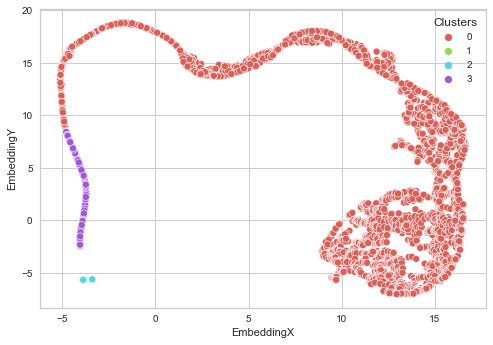

In [46]:
reducer = umap.UMAP(n_neighbors=20, random_state=42)
embedding = reducer.fit_transform(x)

#embedding
df_plot['EmbeddingX'] = embedding[:, 0]
df_plot['EmbeddingY'] = embedding[:, 1]

# UMAP plot
sns.scatterplot(data= df_plot, x='EmbeddingX', y='EmbeddingY', hue='Clusters', 
                palette=sns.color_palette('hls', n_colors=len(df_plot['Clusters'].unique()))
               )

## 9.4 Cluster Profile

In [48]:
# clusters composition by total database 
df_cluster = df9[['CustomerID', 'Clusters']].groupby('Clusters').count().reset_index()
df_cluster['Pencentage'] = 100 * (df_cluster['CustomerID'] / df_cluster['CustomerID'].sum())

# Gross revenue average
avg_rev = df9[['Clusters', 'GrossRevenue']].groupby('Clusters').mean().reset_index() 
df_cluster = pd.merge(df_cluster, avg_rev, on= 'Clusters', how='inner')

# Recency average
avg_rec = df9[['Clusters', 'RecencyDays']].groupby('Clusters').mean().reset_index() 
df_cluster = pd.merge(df_cluster, avg_rec, on= 'Clusters', how='inner')

# InvoiceNo average
avg_in = df9[['Clusters', 'InvoiceNo']].groupby('Clusters').mean().reset_index() 
df_cluster = pd.merge(df_cluster, avg_in, on= 'Clusters', how='inner')

# Ticket average
avg_t = df9[['Clusters', 'AvgTicket']].groupby('Clusters').mean().reset_index() 
df_cluster = pd.merge(df_cluster, avg_t, on= 'Clusters', how='inner')

df_cluster

,Clusters,CustomerID,Pencentage,GrossRevenue,RecencyDays,InvoiceNo,AvgTicket
0,0,4071,93.115279,946.696250,96.429870,3.641120,26.653842
1,1,6,0.137237,182181.981667,6.666667,89.000000,287.897084
2,2,28,0.640439,42614.387143,5.678571,57.821429,174.898571
3,3,267,6.107045,8089.028652,19.823970,19.528090,64.542593


<b>CLUSTER 1 (POSSIBLE INSIDERS): </b>

Total: 6 customers (0.14% of total customers)

Spent (avg): $ 182.181,98

Recency (avg): 6 days

Purchase frequence (avg): 89 purchases

Average ticket: $ 287,90

-------------------------------------------------

<b>CLUSTER 2: </b>

Total: 28 customers (0.64% of total customers)

Spent (avg): $ 42.614,19

Recency (avg): 5 days

Purchase frequence (avg): 58 purchases

Average ticket: $ 174,90

-------------------------------------------------

<b>CLUSTER 0: </b>

Total: 4071 customers (93% of total customers)

Spent (avg): $ 946,70

Recency (avg): 96 days

Purchase frequence (avg): 4 purchases

Average ticket: $ 26,65

-------------------------------------------------

<b>CLUSTER 3: </b>

Total: 267 customers (6.10% of total customers)

Spent (avg): $ 8.089,03

Recency (avg): 19 days

Purchase frequence (avg): 19 purchases

Average ticket: $ 64,54